# Technical Implementation Associate Assignment
## David Miller
### Initial Exploration

In [1]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
# reading in the data and dropping the superfluous column
df = pd.read_csv('awesome_company_multi_touch_report.csv').drop('Unnamed: 0', axis=1)

In [3]:
# adjusting settings to view all columns
pd.set_option('display.max_columns', 50)
# preview the data
df.head()

,date,action,conversion_hash_id,conversion_key,new_to_file,timestamp_conv,total_events,sequence_number,event_id,timestamp_events,type,tier_1,tier_2,tier_3,tier_4,tier_5,matches,original_url,request_referrer,hash_ip_events,uid,normalized,revenue_normalized,first_touch,revenue_first_touch,last_touch,revenue_last_touch,even,revenue_even
0,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,1,d7a4b1a66dc47949312dd1ea45d4782d,2019-04-25 15:16:57,onsite,email,bm23,190425 spring promo flash sale 40p off select ...,image - bottoms,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/mens-b...,NaN,34f6d34c03466f83a1fa1ec7e57944f091a47612a3ee1b...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.088524,16.465505,1,186.0,0,0.0,0.125,23.25
1,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,2,14075938862dd161c46be7dbf397b51f,2019-07-19 14:32:32,onsite,email,kl,190719 summer fp ls101 coast hwy with reviews,NaN,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/mens-p...,NaN,100e999f26e63c5c4255b7a90ee4c2f01b3d81c37ccf8c...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125,23.25
2,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,3,e0468ba75d054d72a630a5aaf723e595,2019-07-22 15:19:45,onsite,email,kl,190722 summer promo vip 50d off order email 3,NaN,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/new-ar...,NaN,ad9199d825bbf7d2c92683e611e95ef46f2f4e86efe660...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125,23.25
3,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,4,a71b757d9769477356c2e38f6faa3e75,2019-08-02 16:15:32,onsite,email,kl,190802 summer fp torrey pant with ctl recs,NaN,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/mens-p...,NaN,4e6466282002838c3c8f6ba745876b8ecb3f09d13402ef...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125,23.25
4,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,5,b3444dc7c0d839459273ef896068347f,2019-08-18 02:48:13,onsite,email,kl,190815 summer sale ab test 48 hour email previ...,NaN,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/email-...,NaN,ad9199d825bbf7d2c92683e611e95ef46f2f4e86efe660...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125,23.25


In [4]:
# examining data types and overall size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14912 entries, 0 to 14911
Data columns (total 29 columns):
date                   14912 non-null object
action                 14912 non-null object
conversion_hash_id     14912 non-null object
conversion_key         14912 non-null int64
new_to_file            14912 non-null int64
timestamp_conv         14912 non-null object
total_events           14912 non-null int64
sequence_number        14912 non-null int64
event_id               14912 non-null object
timestamp_events       14912 non-null object
type                   14912 non-null object
tier_1                 14912 non-null object
tier_2                 14541 non-null object
tier_3                 14540 non-null object
tier_4                 5185 non-null object
tier_5                 3605 non-null object
matches                14912 non-null object
original_url           12125 non-null object
request_referrer       4655 non-null object
hash_ip_events         12125 non-null objec

In [5]:
df.type.unique()

array(['onsite', 'mail'], dtype=object)

## Question 1 
### Which marketing channels seem to be driving the most purchases? Do different models show different results? If they do, what do the differences in results mean?

In [6]:
# setting list of columns we want to grab from the data to analyze revenue
attr_cols = [
            'first_touch', 
             'last_touch', 
             'even',
            'normalized'
]

In [7]:
# first examining by type
onsite = df.query('type == "onsite"')
onsite[attr_cols].describe()

,first_touch,last_touch,even,normalized
count,12125.000000,12125.000000,12125.000000,12125.000000
mean,0.241814,0.274062,0.249574,0.291269
std,0.428200,0.446059,0.279305,0.317723
min,0.000000,0.000000,0.006135,0.000290
25%,0.000000,0.000000,0.066667,0.068166
50%,0.000000,0.000000,0.142857,0.147187
75%,0.000000,1.000000,0.333333,0.380159
max,1.000000,1.000000,1.000000,1.000000


In [8]:
# examining values from each tier to determine which level we should be looking at to group by channel
# clearly its tier_1
for num in range(1,6):
    print(df[f'tier_{num}'].unique())

['email' 'direct mail' 'affiliate' 'organic search' 'paid social'
 'paid search' 'display' 'sms' 'non paid' 'organic social' 'Direct']
['bm23' 'kl' 'navistone' 'practicalawesome' 'google' 'instagram' 'criteo'
 'attentive' 'referrer' 'catalog' 'facebook' 'connexity' 'zaius' 'unp'
 'bing' 'back-in-stock' '18strong' 'yotpo' 'yahoo' nan
 'nbcu_awesomeadvisor' 'referral program' 'twitter' 'genius monkey'
 'pinterest' 'duckduckgo' 'aol' 'the awesomeers journal events'
 'awesomepulpmedia']
['190425 spring promo flash sale 40p off select styles'
 '190719 summer fp ls101 coast hwy with reviews'
 '190722 summer promo vip 50d off order email 3'
 '190802 summer fp torrey pant with ctl recs'
 '190815 summer sale ab test 48 hour email preview with countdown day 1'
 '190830 fall promo fall preview with free 2 day shipping '
 '190913 fall fp boardwalkers plus top it off recs'
 '190906 fall fp polos - targeted remail 190918 at 10am'
 '200114 winter sale under 75d recs' 'pros' 'adpartner' 'www.google.co

In [9]:
# iterating over each unique channel, filtering the data by it and then finding basic counting stats for each
# we can see how much a few categories dominate the dataset
for val in df['tier_1'].unique():
    print(val)
    filt = df[df.tier_1 == val]
    print(filt[attr_cols].describe())

email
       first_touch   last_touch         even   normalized
count  6098.000000  6098.000000  6098.000000  6098.000000
mean      0.147753     0.161036     0.151901     0.196741
std       0.354884     0.367595     0.166426     0.217676
min       0.000000     0.000000     0.006135     0.005251
25%       0.000000     0.000000     0.058824     0.069977
50%       0.000000     0.000000     0.100000     0.120950
75%       0.000000     0.000000     0.166667     0.220354
max       1.000000     1.000000     1.000000     1.000000
direct mail
       first_touch   last_touch         even   normalized
count  2787.000000  2787.000000  2787.000000  2787.000000
mean      0.379978     0.239684     0.346220     0.164822
std       0.485468     0.426967     0.256182     0.300081
min       0.000000     0.000000     0.006135     0.000543
25%       0.000000     0.000000     0.142857     0.012031
50%       0.000000     0.000000     0.333333     0.033987
75%       1.000000     0.000000     0.500000     0.064

In [143]:
# examining just total conversions by channel
convs_by_tier1 = df[['conversion_hash_id', 'tier_1']].drop_duplicates()
conv_view = convs_by_tier1.groupby('tier_1').count().reset_index()
# the conversion_hash_id column represents number of conversions
conv_view

,tier_1,conversion_hash_id
0,Direct,371
1,affiliate,24
2,direct mail,2015
3,display,349
4,email,1495
5,non paid,379
6,organic search,930
7,organic social,64
8,paid search,1180
9,paid social,337


[Text(0, 0.5, 'total conversions'), Text(0.5, 0, 'marketing channel')]

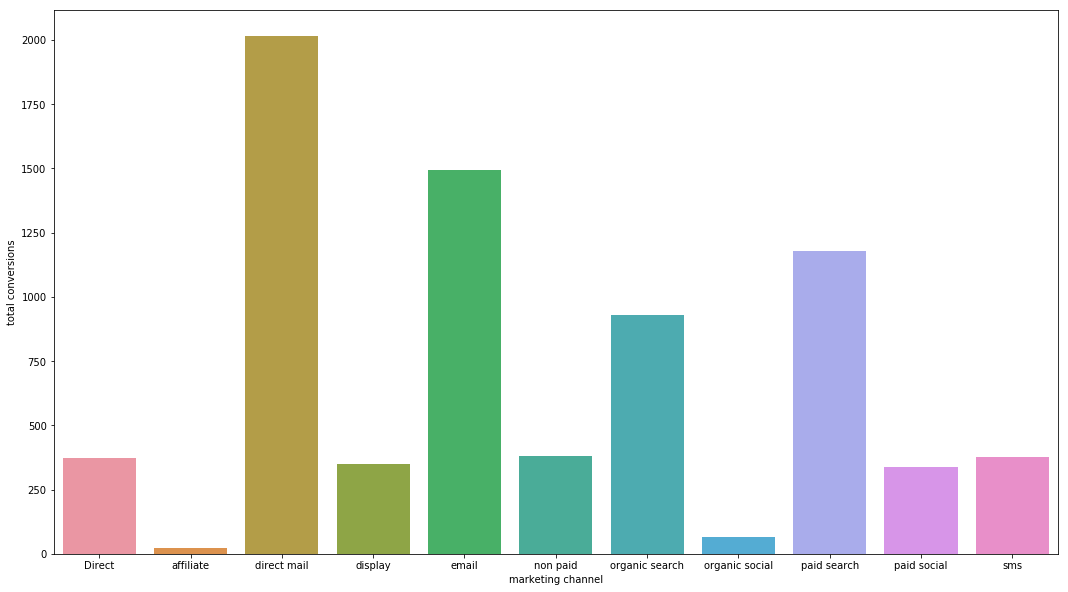

In [148]:
# and a visualization of the above chart
plt.figure(figsize=(18,10))
sns.barplot(data=conv_view, x='tier_1', y='conversion_hash_id').set(
    xlabel='marketing channel', ylabel='total conversions')

In [58]:
# this is really the most valuable and informative view as we can see how much the top channels vary when picking different
# attribution models
df.groupby(['type', 'tier_1'])[['revenue_last_touch', 
                                'revenue_first_touch',
                               'revenue_even',
                               'revenue_normalized']].sum()

revenue_last_touch  revenue_first_touch   revenue_even  \
type   tier_1                                                                   
mail   direct mail               82354.11            135530.22  121992.254136   
onsite Direct                    44922.24             44922.24   44922.240000   
       affiliate                   110.50               778.00     738.727357   
       display                   15666.63             14032.17   15601.194300   
       email                    111156.98            102011.79  105733.752140   
       non paid                  27434.69             16554.95   21178.648206   
       organic search            67841.11             60904.78   58867.002096   
       organic social             2833.80              1602.30    1781.945768   
       paid search               84802.67             75297.99   75680.140937   
       paid social               21820.02             21530.42   20871.662209   
       sms                       30229.55             16007.44   21804.732851   

                       revenue_normalized  
type   tier_1                              
mail   direct mail           57848.924724  
onsite Direct                44922.240000  
       affiliate               138.457598  
       display               15276.052561  
       email                138213.412075  
       non paid              24855.088884  
       organic search        74972.081397  
       organic social         2099.126923  
       paid search           81200.451598  
       paid social           22910.166149  
       sms                   26736.298092

In [59]:
# basic counting stats like earlier, but this time breaking down revenue
for val in df['tier_1'].unique():
    print(val)
    filt = df[df.tier_1 == val]
    print(filt[['revenue_last_touch', 
                                'revenue_first_touch',
                               'revenue_even',
                               'revenue_normalized']].describe())

email
       revenue_last_touch  revenue_first_touch  revenue_even  \
count         6098.000000          6098.000000   6098.000000   
mean            18.228432            16.728729     17.339087   
std             55.546361            52.926016     27.578270   
min              0.000000             0.000000      0.000000   
25%              0.000000             0.000000      4.106667   
50%              0.000000             0.000000      8.444444   
75%              0.000000             0.000000     18.712500   
max           1322.000000          1322.000000    384.000000   

       revenue_normalized  
count         6098.000000  
mean            22.665368  
std             36.554039  
min              0.000000  
25%              4.967849  
50%             10.243665  
75%             24.077459  
max            621.395943  
direct mail
       revenue_last_touch  revenue_first_touch  revenue_even  \
count         2787.000000          2787.000000   2787.000000   
mean            29.549376

In [11]:
# examining direct further since it seems that each one of these has only one touch point in the journey
df.query('tier_1 == "Direct"').sequence_number.value_counts()

1    371
Name: sequence_number, dtype: int64

In [12]:
# examining average number of total events by channel
total_events = df[[
                    'uid', 
                    'total_events',
                    'type',
                    'tier_1'
]].drop_duplicates()

In [13]:
len(df),len(total_events)

(14912, 7317)

In [158]:
total_events.groupby(['type', 'tier_1'])['total_events'].sum()

AttributeError: 'numpy.float64' object has no attribute 'groupby'

## Question 2
### The client would also like to know more about how our customers interact with their marketing before purchasing. 

### a) How long does it take a customer to purchase after interacting with a given marketing channel?

In [15]:
# converting conversion time and given event time to datetime objects for analysis
df.timestamp_conv = pd.to_datetime(df.timestamp_conv)
df.timestamp_events = pd.to_datetime(df.timestamp_events)

In [16]:
# creating new column that finds the difference in these two columns yielding a time delta object
df['delta'] = df.timestamp_conv - df.timestamp_events

In [17]:
# examining the data with the new column
df.head()

,date,action,conversion_hash_id,conversion_key,new_to_file,timestamp_conv,total_events,sequence_number,event_id,timestamp_events,type,tier_1,tier_2,tier_3,tier_4,tier_5,matches,original_url,request_referrer,hash_ip_events,uid,normalized,revenue_normalized,first_touch,revenue_first_touch,last_touch,revenue_last_touch,even,revenue_even,delta
0,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,1,d7a4b1a66dc47949312dd1ea45d4782d,2019-04-25 15:16:57,onsite,email,bm23,190425 spring promo flash sale 40p off select ...,image - bottoms,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/mens-b...,NaN,34f6d34c03466f83a1fa1ec7e57944f091a47612a3ee1b...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.088524,16.465505,1,186.0,0,0.0,0.125,23.25,267 days 06:04:26
1,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,2,14075938862dd161c46be7dbf397b51f,2019-07-19 14:32:32,onsite,email,kl,190719 summer fp ls101 coast hwy with reviews,NaN,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/mens-p...,NaN,100e999f26e63c5c4255b7a90ee4c2f01b3d81c37ccf8c...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125,23.25,182 days 06:48:51
2,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,3,e0468ba75d054d72a630a5aaf723e595,2019-07-22 15:19:45,onsite,email,kl,190722 summer promo vip 50d off order email 3,NaN,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/new-ar...,NaN,ad9199d825bbf7d2c92683e611e95ef46f2f4e86efe660...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125,23.25,179 days 06:01:38
3,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,4,a71b757d9769477356c2e38f6faa3e75,2019-08-02 16:15:32,onsite,email,kl,190802 summer fp torrey pant with ctl recs,NaN,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/mens-p...,NaN,4e6466282002838c3c8f6ba745876b8ecb3f09d13402ef...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125,23.25,168 days 05:05:51
4,2020-01-17,action=conv.purchase,005a280dac8447267c4c439193aed874,2089092776011,0,2020-01-17 21:21:23,8,5,b3444dc7c0d839459273ef896068347f,2019-08-18 02:48:13,onsite,email,kl,190815 summer sale ab test 48 hour email previ...,NaN,NaN,"""[\""Email\""]""",https://awesome_company.com/collections/email-...,NaN,ad9199d825bbf7d2c92683e611e95ef46f2f4e86efe660...,rbos-2575c49c-edf2-4705-a3f1-9864be0f0c07,0.130211,24.219214,0,0.0,0,0.0,0.125,23.25,152 days 18:33:10


In [71]:
# converting the delta objects to integers so we can actually calculate average times by channel
df.delta = df.delta.values.astype(np.int64)

In [77]:
# and here are the results. quite a large amount of variance from 15 days all the day up to 84!
deltas = df.groupby(['type', 'tier_1'])['delta'].mean()
pd.to_timedelta(deltas)

type    tier_1        
mail    direct mail      16 days 04:18:39.772874
onsite  Direct           15 days 18:26:55.059299
        affiliate        84 days 19:13:16.550000
        display          66 days 00:25:53.994020
        email            68 days 03:36:03.952279
        non paid         58 days 10:39:13.132911
        organic search   48 days 15:06:09.475781
        organic social   73 days 21:56:09.506024
        paid search      39 days 12:03:48.678998
        paid social      38 days 13:44:35.320941
        sms              18 days 06:20:16.971649
Name: delta, dtype: timedelta64[ns]

### b/c) Can you look at each customer and show the path they're taking to purchase? E.g. Customer A: Direct Mail -> Paid Social -> Paid Search -> Purchase. What are the most common paths to purchase?

In [106]:
data = []
# iterating over reach unique conversion
for hash_id in df.conversion_hash_id.unique():
#     filtering the data on each unique conversion
    filt = df[df.conversion_hash_id == hash_id]
#   grabbing the total number of events (grabbing mean since all values in this filter should be identical)
    total_events = filt.total_events.values.mean()
#     making that the number of events matches the total events value as that should always be true
    if len(filt) != total_events:
        print(has_id)
        raise Exception('user converted more than once')
#       creating a tuple of all of the different types of channel that were hit in the leadup to conversion
# entering as a tuple since the counter method we use prefers that data type
    path = tuple(filt['tier_1'].values)
    data.append(path)

In [117]:
# creating various lists of paths that have a certain number of touchpoints, and then over a certain amount
# we do this since the initial view showed that the shorter the path, the more repeats there were
one_event = [x for x in data if len(x)==1]
two_events = [x for x in data if len(x)==2]
three_events = [x for x in data if len(x)==3]
four_events = [x for x in data if len(x)==4]
five_events = [x for x in data if len(x)==5]
plus_five_events = [x for x in data if len(x) > 5]

In [120]:
# putting all of the lists into another list, then grabbing the five most common values from each
events = [one_event, two_events, three_events, four_events, five_events, plus_five_events]
most_common = [Counter(x for x in path).most_common(5) for path in events]

In [121]:
# and here are the results. unsurprisingly the conversions that only hit one point were the most common
# we see email and direct email occur very frequently here, but paid social also makes several appearances
most_common

[[(('Direct',), 371),
  (('direct mail',), 258),
  (('paid search',), 247),
  (('organic search',), 180),
  (('email',), 125)],
 [(('direct mail', 'direct mail'), 121),
  (('email', 'direct mail'), 70),
  (('paid search', 'direct mail'), 63),
  (('direct mail', 'organic search'), 61),
  (('direct mail', 'email'), 51)],
 [(('email', 'direct mail', 'direct mail'), 37),
  (('email', 'email', 'direct mail'), 33),
  (('direct mail', 'direct mail', 'paid search'), 26),
  (('direct mail', 'direct mail', 'organic search'), 23),
  (('paid social', 'paid social', 'paid social'), 18)],
 [(('email', 'email', 'email', 'direct mail'), 17),
  (('email', 'email', 'direct mail', 'direct mail'), 14),
  (('paid social', 'paid social', 'paid social', 'paid social'), 13),
  (('direct mail', 'email', 'email', 'email'), 13),
  (('email', 'email', 'email', 'email'), 10)],
 [(('email', 'email', 'email', 'email', 'direct mail'), 11),
  (('email', 'email', 'email', 'direct mail', 'direct mail'), 10),
  (('direct

## Question 3
### How would you advise this client on where they should continue investing marketing dollars? They are currently looking to grow the company's customer footprint by bringing on new customers. Is there any other information they could potentially provide to help make this determination?


In [151]:
# since the client wants to grow the number of customers, we should only look at conversions from them
new_convs = df.query('new_to_file == 1')

In [155]:
# total number of conversions by channel for new customers
new_convs.groupby('tier_1')['new_to_file'].sum()

tier_1
Direct            197
affiliate           5
direct mail       235
display           107
email             604
non paid          139
organic search    352
organic social     30
paid search       548
paid social       366
sms               185
Name: new_to_file, dtype: int64

In [156]:
# total normalized revenue by channel for new customers
new_convs.groupby('tier_1')['revenue_normalized'].sum()

tier_1
Direct            24684.350000
affiliate            59.301286
direct mail        6565.175169
display            3096.849712
email             22144.585287
non paid          13844.662123
organic search    32137.996513
organic social      890.822479
paid search       36499.676025
paid social       13097.150700
sms               14782.550705
Name: revenue_normalized, dtype: float64

In [ ]:
new_convs.groupby('tier_1')['revenue_even'].sum()

In [ ]:
new_convs.groupby('tier_1')['revenue_first_touch'].sum()

In [ ]:
new_convs.groupby('tier_1')['revenue_last_touch'].sum()

## Bonus
### After looking at the data, the client notices that non-paid touchpoints are receiving more credit than they would like. They want to see what the models (first touch, last touch, even weight) show if these touchpoints were removed from a customer’s path to conversion (Email, Non-paid, Organic Social, Organic Search).

In [60]:
# looking at tier_1 again to know how to exclude them from the data
df.tier_1.unique()

array(['email', 'direct mail', 'affiliate', 'organic search',
       'paid social', 'paid search', 'display', 'sms', 'non paid',
       'organic social', 'Direct'], dtype=object)

In [67]:
# filtering the data accordingly. a very cumbersome query!
exclude = ['email', 'non paid', 'organic social', 'organic search']
paid_df = df[(df.tier_1 != 'email') & (df.tier_1 != 'non paid') & (df.tier_1 != 'organic social') & (df.tier_1 != 'organic search')]

In [68]:
# double checking our work
paid_df.tier_1.unique()

array(['direct mail', 'affiliate', 'paid social', 'paid search',
       'display', 'sms', 'Direct'], dtype=object)

In [122]:
paid_df.columns

Index(['date', 'action', 'conversion_hash_id', 'conversion_key', 'new_to_file',
       'timestamp_conv', 'total_events', 'sequence_number', 'event_id',
       'timestamp_events', 'type', 'tier_1', 'tier_2', 'tier_3', 'tier_4',
       'tier_5', 'matches', 'original_url', 'request_referrer',
       'hash_ip_events', 'uid', 'normalized', 'revenue_normalized',
       'first_touch', 'revenue_first_touch', 'last_touch',
       'revenue_last_touch', 'even', 'revenue_even', 'delta'],
      dtype='object')

In [123]:
# and now we look at basic counting stats of each channel by each attribution model
paid_df.groupby('tier_1')['revenue_normalized'].describe()

,count,mean,std,min,25%,50%,75%,max
tier_1,,,,,,,,
Direct,371.0,121.084205,97.256915,5.000000,55.250000,98.000000,162.050000,979.630000
affiliate,40.0,3.461440,3.991286,0.332169,0.981236,1.572531,4.181648,15.186669
direct mail,2787.0,20.756701,47.711228,0.000000,0.978362,2.882229,10.877600,540.000000
display,669.0,22.834159,89.280875,0.047357,1.447753,4.858357,15.651193,2030.000000
paid search,1757.0,46.215396,69.424825,0.000000,5.381400,20.115247,56.798646,721.687104
paid social,807.0,28.389301,35.122218,0.118921,5.935782,16.544651,34.818385,260.000000
sms,388.0,68.907985,68.238161,1.208892,19.796751,44.139867,97.006460,467.172959


In [124]:
paid_df.groupby('tier_1')['revenue_first_touch'].describe()

,count,mean,std,min,25%,50%,75%,max
tier_1,,,,,,,,
Direct,371.0,121.084205,97.256915,5.0,55.25,98.0,162.05,979.63
affiliate,40.0,19.450000,61.735639,0.0,0.00,0.0,0.00,337.00
direct mail,2787.0,48.629429,85.699699,0.0,0.00,0.0,72.00,767.00
display,669.0,20.974843,93.340115,0.0,0.00,0.0,0.00,2030.00
paid search,1757.0,42.855999,81.952061,0.0,0.00,0.0,58.50,933.75
paid social,807.0,26.679579,52.965026,0.0,0.00,0.0,36.00,301.00
sms,388.0,41.256289,84.867536,0.0,0.00,0.0,57.85,951.25


In [125]:
paid_df.groupby('tier_1')['revenue_last_touch'].describe()

,count,mean,std,min,25%,50%,75%,max
tier_1,,,,,,,,
Direct,371.0,121.084205,97.256915,5.0,55.25,98.0,162.050,979.63
affiliate,40.0,2.762500,17.471584,0.0,0.00,0.0,0.000,110.50
direct mail,2787.0,29.549376,68.310254,0.0,0.00,0.0,0.000,650.00
display,669.0,23.417982,96.569088,0.0,0.00,0.0,0.000,2030.00
paid search,1757.0,48.265606,90.455363,0.0,0.00,0.0,65.000,1022.00
paid social,807.0,27.038439,52.133241,0.0,0.00,0.0,38.000,301.00
sms,388.0,77.911211,97.969797,0.0,0.00,52.2,124.325,951.25


In [126]:
paid_df.groupby('tier_1')['revenue_even'].describe()

,count,mean,std,min,25%,50%,75%,max
tier_1,,,,,,,,
Direct,371.0,121.084205,97.256915,5.000000,55.250000,98.0000,162.050000,979.630000
affiliate,40.0,18.468184,21.420564,1.800000,4.224138,11.2500,21.993750,96.642857
direct mail,2787.0,43.771889,51.719814,0.000000,11.666667,26.2500,56.000000,540.000000
display,669.0,23.320171,84.176593,0.476190,4.000000,9.6875,22.071429,2030.000000
paid search,1757.0,43.073501,56.834336,0.000000,8.750000,22.5000,55.500000,641.000000
paid social,807.0,25.863274,31.648039,0.476190,7.000000,16.2500,32.500000,260.000000
sms,388.0,56.197765,61.314448,1.124324,14.799107,32.4000,75.250000,339.300000
